In [1]:
import numpy as np
import psana as ps
import matplotlib.pyplot as plt
import sys
import time
import pickle
import os
from Functions import *
from raw_data_class import RawData as RDC
from processed_data_class import processed_data_class as PDC
%matplotlib notebook

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [71]:
save_dir = '/reg/d/psdm/cxi/cxilv2718/results/data/'
calib_dir = '/reg/d/psdm/cxi/cxilv2718/results/calibrations/'
runs = np.arange(20,27) # goes from first value in range to last - 1
epix_roi= [95,140,233,340]
xrt_roi = [400,1100]
calibration_file = 'calibration_1'

# Processing or Loading
process_raw = False
on_off = True # Do you want to plot the raw data?
plot_one = 20 
plot_one_idx = np.searchsorted(runs,plot_one)
x_axis = 'energy' # 'pixels' or 'energy'
to_cal_file = [calib_dir, calibration_file]

In [72]:
# Energy Calibration, plot raw calibration runs with pixel axis and populate these arrays
save_cal = False
if save_cal is True:
    calib_runs = list(range(13,19))
    notch_energies = [7.04,7.05,7.06,7.07,7.075,7.08] # keV
    xrt_pixels = [1036,864,698,528,450,0] # enter 0 if you can't see the notch
    epix_pixels = [0,250,275,300,312,0] # enter 0 if you can't see the notch

    labels = ['notch_energies','xrt_pixels','epix_pixels','rois','to_cal_file','calib_runs']
    rois = [xrt_roi,epix_roi]
    calib_in = [labels, notch_energies,xrt_pixels,epix_pixels,rois,to_cal_file,calib_runs]
    calib_out = energy_calib.energy_calib(calib_in,save_cal)
    print('')
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]
if os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl') and save_cal is False:
    with open(to_cal_file[0] + to_cal_file[1] +'.pkl', "rb") as f:
        calib_out = pickle.load(f)
    print('The loaded calibration settings are: ')
    current_cal = [print(calib_out[0][i] +' : '+ str(calib_out[i+1])) for i in list(range(0,5))+list(range(8,10))]   
    
if not os.path.exists(to_cal_file[0]+to_cal_file[1]+'.pkl'):
    print(to_cal_file[1] + ' does not exist.')
    print('No calibration file loaded.')

The loaded calibration settings are: 
notch_energies : [7.04, 7.05, 7.06, 7.07, 7.075, 7.08]
xrt_pixels : [1036, 864, 698, 528, 450, 0]
epix_pixels : [0, 250, 275, 300, 312, 0]
rois : [[400, 1100], [95, 140, 233, 340]]
to_cal_file : ['/reg/d/psdm/cxi/cxilv2718/results/calibrations/', 'calibration_1']
epix_motor : 23.23792
time_calibrated : 2021-05-28 09:20:19.057830


exp=cxilv2718:run=20:smd
exp=cxilv2718:run=21:smd
exp=cxilv2718:run=22:smd
exp=cxilv2718:run=23:smd
exp=cxilv2718:run=24:smd
exp=cxilv2718:run=25:smd
exp=cxilv2718:run=26:smd


<IPython.core.display.Javascript object>


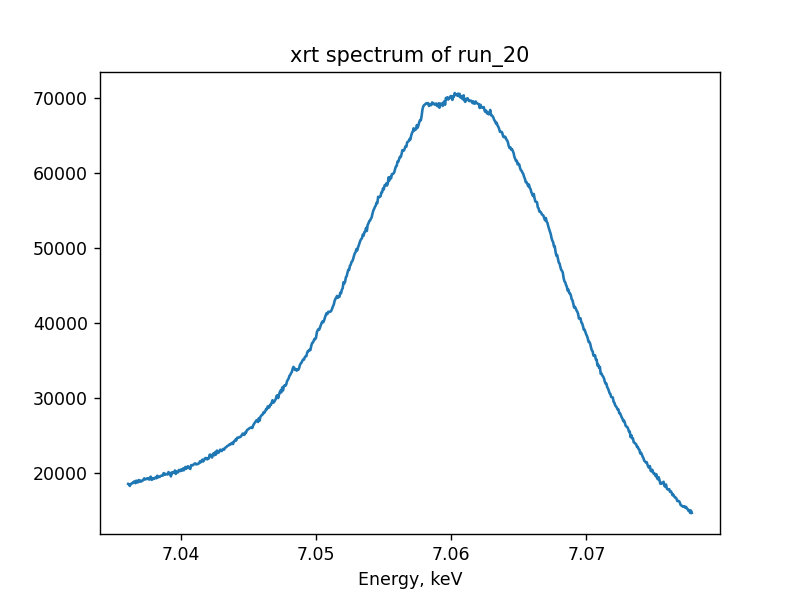

<IPython.core.display.Javascript object>


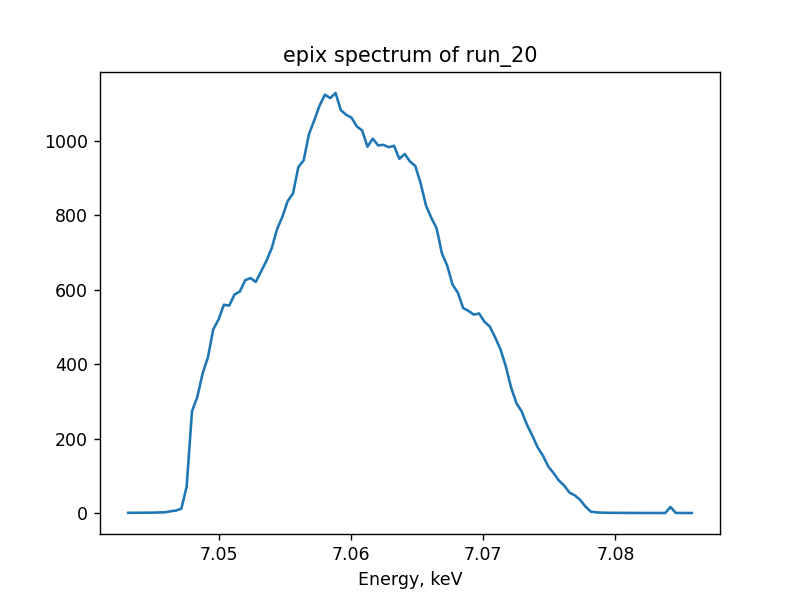

<IPython.core.display.Javascript object>


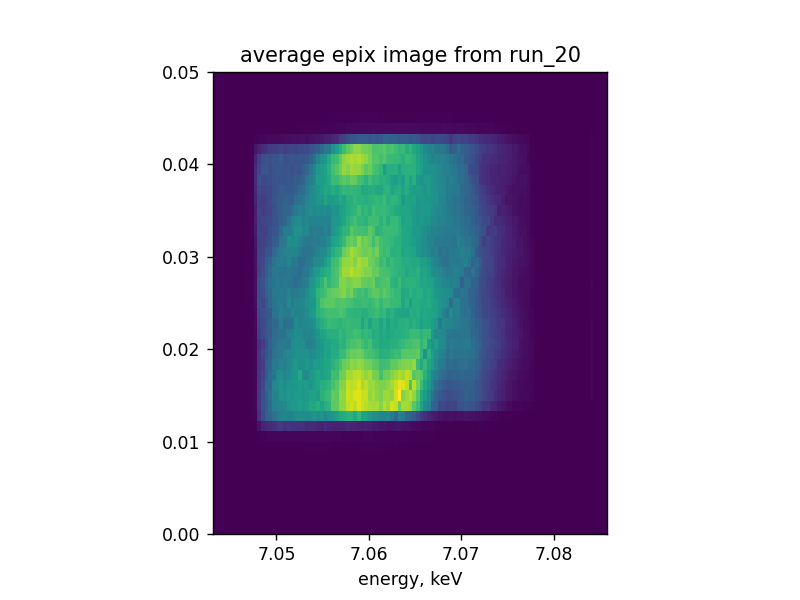

<IPython.core.display.Javascript object>


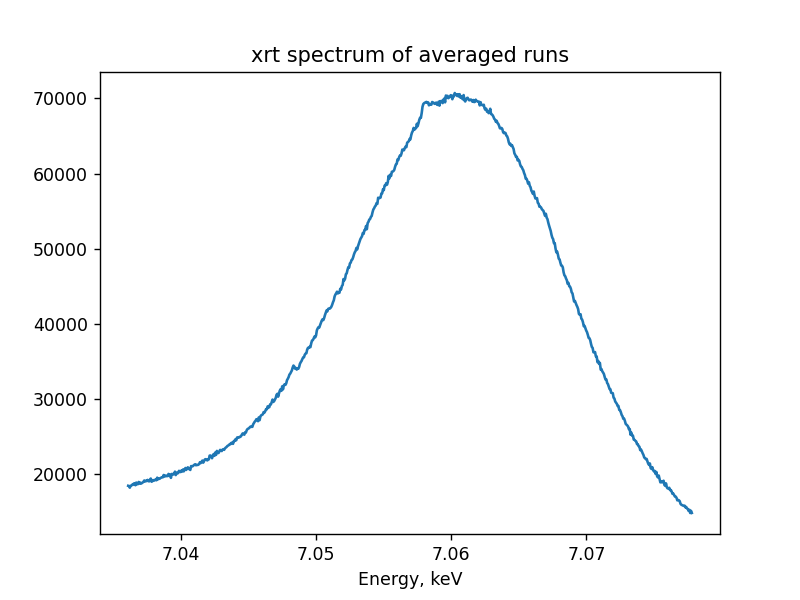

<IPython.core.display.Javascript object>


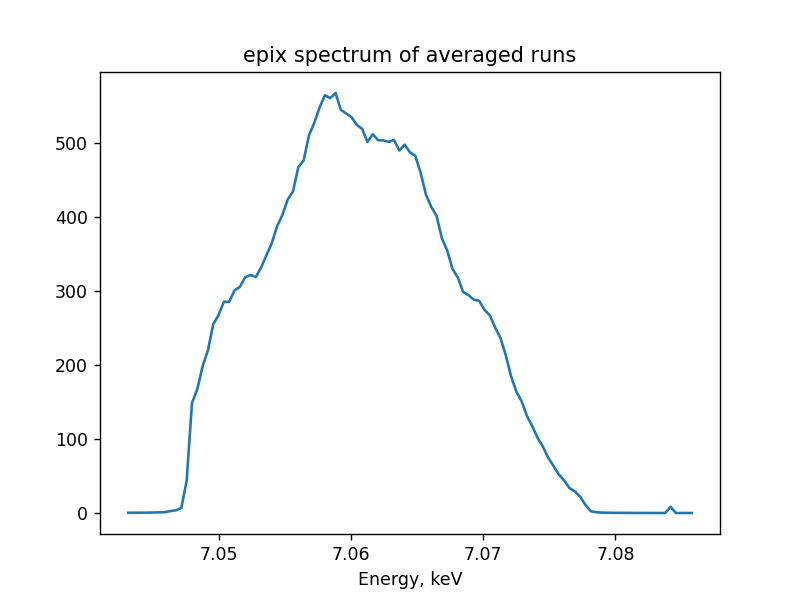

In [73]:
# Raw Data
raw_datas = []
for run in runs:
    scan_name = 'run_' + str(run)
    ds_string = 'exp=cxilv2718:run='+str(run)+':smd'
    print(ds_string)
    if process_raw:
        raw_data = load_data.load_data(save_dir,scan_name,ds_string,epix_roi,xrt_roi)
    else:
        if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
            with open(save_dir + scan_name + "/" + "rawdata.pkl", "rb") as f:
                raw_data = pickle.load(f)
        else:
            print('You are trying to load a file that does not exist.')
    if os.path.exists(save_dir + scan_name + "/" + "rawdata.pkl"):
        raw_datas = raw_datas + [raw_data]

[load_data.add_cal_info(raw_datas[i],to_cal_file) for i in range(0,len(raw_datas))]
plot_raw.plot_raw(raw_datas, plot_one, x_axis, on_off,to_cal_file)

In [74]:
# Applys an energy window to both spectra. Decide on window based on epix spectrum above.
# Also, reduces the resolution of the xrt spectrometer to match that of the epix.
energy_window = [7.047,7.07731]
for i in range(0,len(raw_datas)):
    reduce_xrt_res.apply_window(raw_datas[i],energy_window)
    reduce_xrt_res.reduce_res(raw_datas[i])


# plt.figure()
# plt.plot(raw_data.epix_energy_windowed,np.sum(raw_data.xrt_red_res,0))
# plt.plot(raw_data.xrt_energy_windowed,np.sum(raw_data.xrt_windowed,0),alpha=0.5)
# plt.show()

<IPython.core.display.Javascript object>


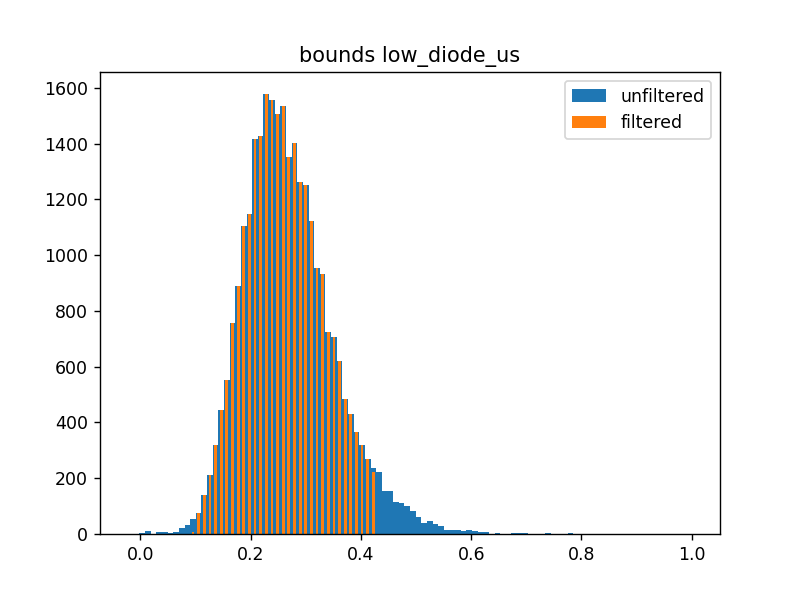

Filter info for run_20:
Filter0 removed 1436 unique shots out of 28521 total shots.


<IPython.core.display.Javascript object>


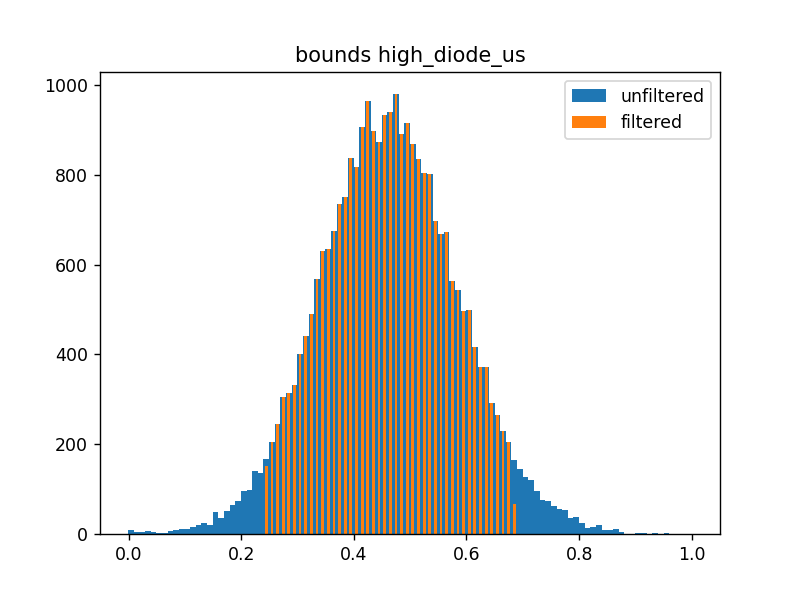

Filter1 removed 1603 unique shots out of 28521 total shots.


<IPython.core.display.Javascript object>


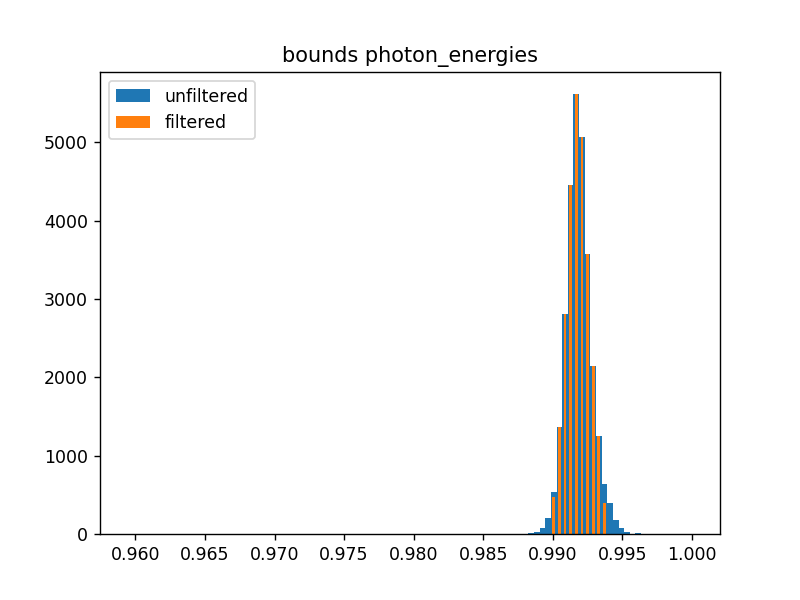

Filter2 removed 1075 unique shots out of 28521 total shots.


<IPython.core.display.Javascript object>


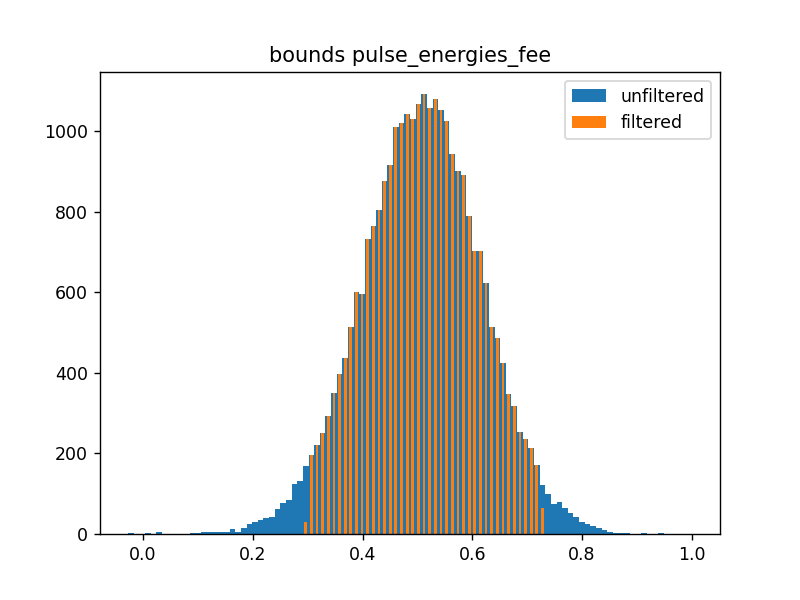

Filter3 removed 468 unique shots out of 28521 total shots.


<IPython.core.display.Javascript object>


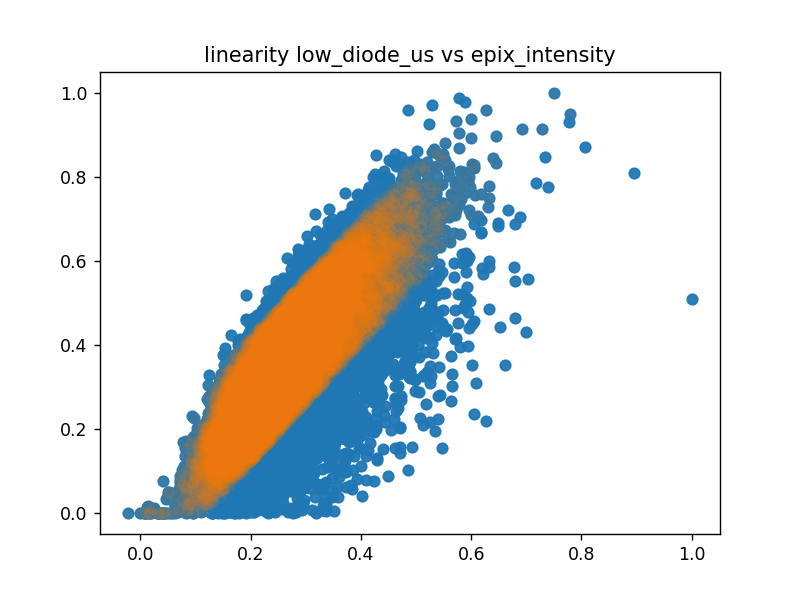

Filter4 removed 1740 unique shots out of 28521 total shots.


<IPython.core.display.Javascript object>


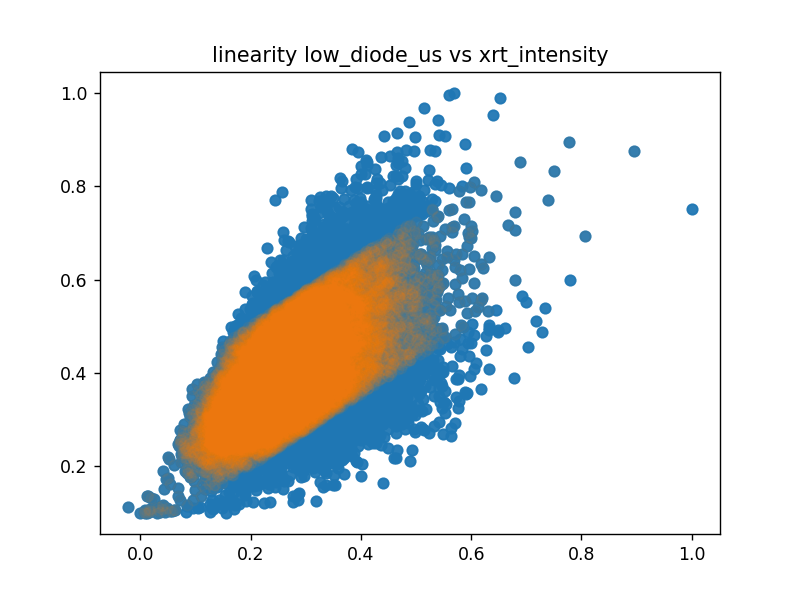

Filter5 removed 1030 unique shots out of 28521 total shots.
The combined filters removed 7352 shots out of 28521 total shots.



In [75]:
# Inputs for filters
# filters = [filter0,filter1, ...,filterN]

            # filterX[0] = On/Off # True or False
            # filterX[1] = Type # 'bounds','linearity','rms'
            # filterX[2] = [par0,par1,...,parN]
            
                # If Type = 'bounds'    # par0 = 'key_0' # key_X is string from raw_data.getKeys()
                                        # par1 = lower bound # check raw_data.keyX for starting point 
                                        # par2 = upper bound # 'None' if no upper bound
                                        # par3 = number of stds from median allowed
            
                # If Type = 'linearity' # par0 = 'key_0','key_1' # key_0 and key_1 and x and y values, respectively
                                        # par1 = width of filter
                    
# filterX[3] = [in_1, in_2]
                # in_1 = On/Off # True or false
                # in_2 = plot_one # The run you want to see plots for. Declared above in the 2nd block.

# print(raw_data.getKeys()) 
suspress_output = True
filt0 = [True,'bounds',['low_diode_us',0.1,'None',2],[True,plot_one]]
filt1 = [True,'bounds',['high_diode_us',0.1,'None',1.8],[True,plot_one]]
filt2 = [True,'bounds',['photon_energies',0.95,'None',2],[True,plot_one]]
filt3 = [True,'bounds',['pulse_energies_fee',0.3,'None',2],[True,plot_one]]

# The linearity filters create their fit based on data points that make it through
# the bounds filters.

#filt4 = [True,'linearity',['xrt_intensity','epix_intensity',0.08],[True,plot_one]]
filt5 = [True,'linearity',['low_diode_us','epix_intensity',0.15],[True,plot_one]]
filt6 = [True,'linearity',['low_diode_us','xrt_intensity',0.15],[True,plot_one]]

filters = [filt0,filt1,filt2,filt3,filt5,filt6]
conditions = [Filters.filtering(raw_datas[i],filters,suspress_output) for i in range(0,len(raw_datas))]

Loaded processed_data for run run_20
Loaded processed_data for run run_21
Loaded processed_data for run run_22
Loaded processed_data for run run_23
Loaded processed_data for run run_24
Loaded processed_data for run run_25
Loaded processed_data for run run_26
RMSE filter information for run run_20
The epix rmse condition removed 63 out of 21169 shots.
The xrt rmse condition removed 360 out of 21169 shots.
Both rmse conditions removed 417 out of 21169 shots.



<IPython.core.display.Javascript object>


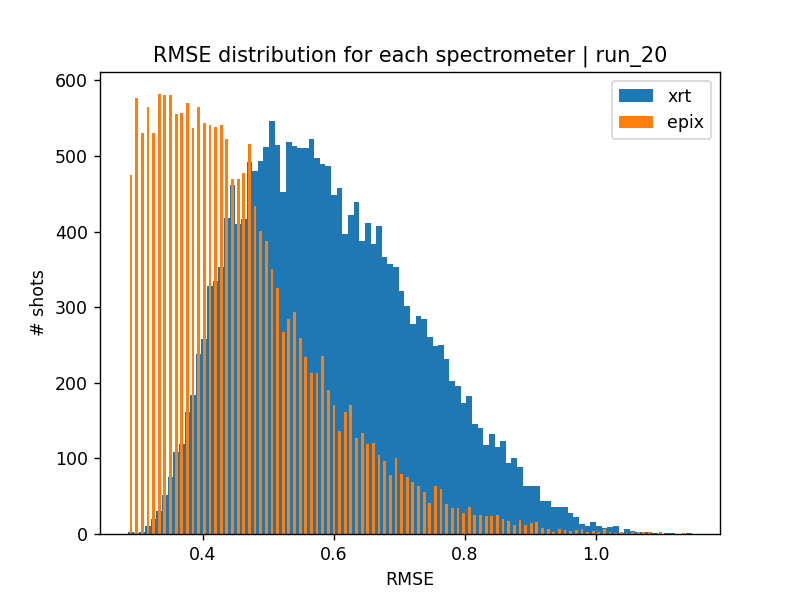

In [81]:
# Make or load processed data
make_pro = False
pro_datas = []
probe_run = [26,make_pro]

for i in range(0,len(raw_datas)):
    if make_pro:
        if i is 0:
            new_scale = raw_datas[np.searchsorted(runs,probe_run[0])].make_pro_data(conditions[np.searchsorted(runs,probe_run[0])],filters)
            probe_run = new_scale.scale_spectrometers(probe_run)
        processed_data = raw_datas[i].make_pro_data(conditions[i],filters)
        pro_datas = pro_datas + [processed_data]
    else:
        if os.path.exists(raw_datas[i].save_dir + raw_datas[i].scan_name + "/" + "pro_data.pkl"):
            with open(raw_datas[i].save_dir + raw_datas[i].scan_name + "/" + "pro_data.pkl", "rb") as f:
                processed_data = pickle.load(f)
                pro_datas = pro_datas + [processed_data]
                print('Loaded processed_data for run ' + processed_data.scan_name)
        else:
            print('You are trying to load a file that does not exist.')
        
    pro_datas[i].scale_spectrometers(probe_run)
rms_parameters = [[1,0.8],plot_one,False] # [[min_rmse_epix, min_rmse_xrt],plot_all,plot_one]
                                        # plot_one: Run # you want to plot, or 'None'
                                        # plot_all: True or False to plot histograms for each run in pro_datas
suspress_output = True

rms_conditions = [Filters.rms_filter(pro_datas[i],rms_parameters,suspress_output) for i in range(0,len(pro_datas))]

pro_datas = [Filters.apply_rms_filter(pro_datas[i],rms_conditions[i][2]) for i in range(0,len(pro_datas))]
# probe_run = [26,True]
# probe_run = pro_datas[-1].scale_spectrometers(probe_run)

<IPython.core.display.Javascript object>


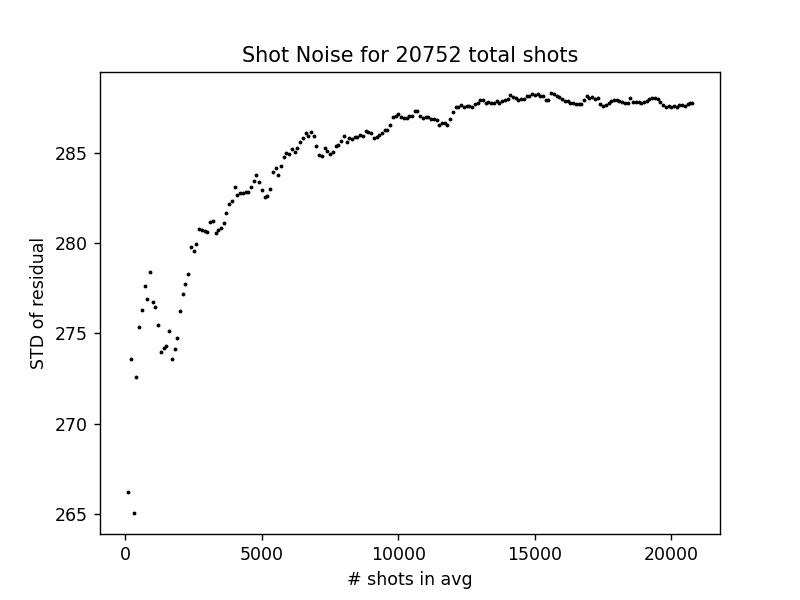

<IPython.core.display.Javascript object>


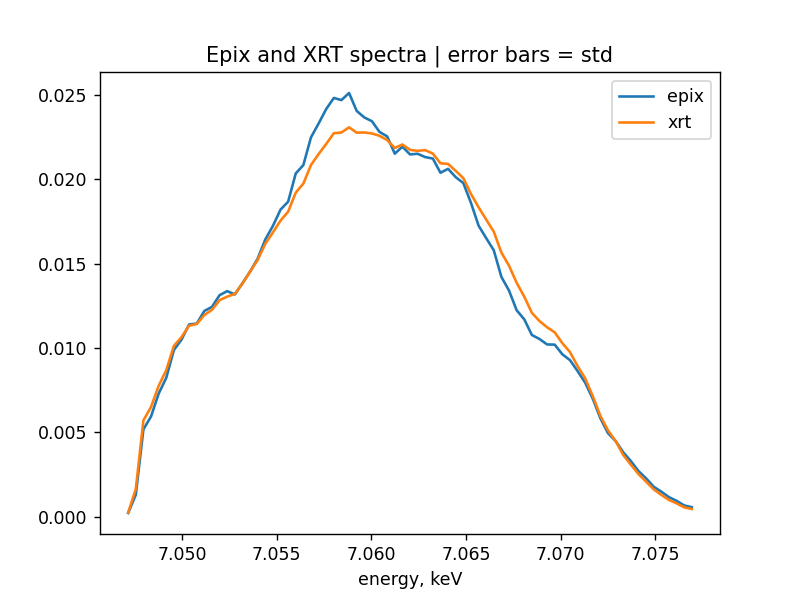

<IPython.core.display.Javascript object>


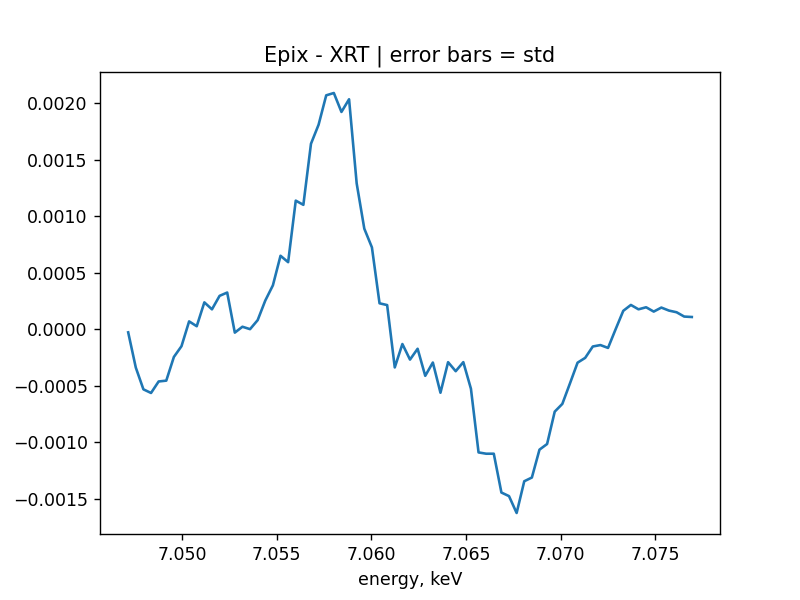

<IPython.core.display.Javascript object>


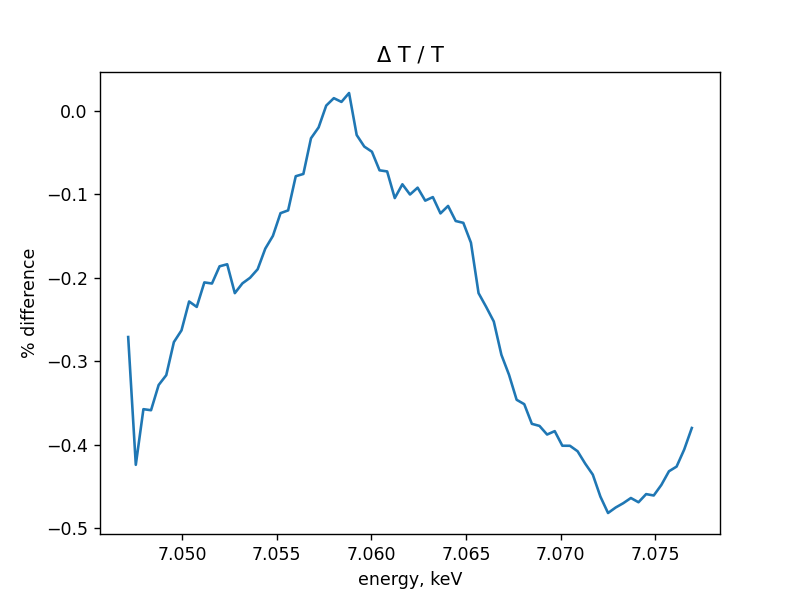

In [82]:
# Plotting the processed data
# plot_pro      .check_SN(processed_data, On/Off): Starts off with randomizing order of shots.
                    # Each data point corresponds to the standard deviation
                    # of the mean of x residuals; epix_spectrum-xrt_spectrum.
                    # Should give us an idea of how signal/noise improves with averaging.
                    # Smoothness of curve could also report on effectiveness of filters.
resid = plot_pro.check_SN(pro_datas[plot_one_idx],True)
plot_pro.plot_one_run(pro_datas[plot_one_idx],True)
# plot_pro.plot_average(pro_datas,True)




In [9]:
# total_I_epix = processed_data.epix_intensity
# total_I_xrt = processed_data.xrt_intensity
# energy = processed_data.epix_energy_windowed
# events = processed_data.eventIDs
# epix = processed_data.epix_windowed
# xrt = processed_data.xrt_based
# epix_avg = np.mean(epix,0)
# xrt_avg = np.mean(xrt,0)

# epix_norm = epix/np.max(epix_avg)
# xrt_norm = xrt/np.max(xrt_avg)
# epix_avg_norm = epix_avg/np.max(epix_avg)
# xrt_avg_norm = xrt_avg/np.max(xrt_avg)


# epix_rms = np.sqrt(np.mean(np.subtract(epix_avg_norm,epix_norm)**2,1))
# xrt_rms = np.sqrt(np.mean(np.subtract(xrt_avg_norm,xrt_norm)**2,1))